# Setting up an RNA Science Environment

The computational biology field has a lot of helpful software packages for interacting with RNA sequences and experimental data. First, let's install `arnie`, a helpful utility library that simplifies interacting with various secondary structure prediction packages.

In [1]:
!pip install arnie

Arnie needs at least one secondary structure predictor, so let's install `EternaFold`. [Eternafold](https://www.nature.com/articles/s41592-022-01605-0) is a leading prediction package that was trained using sequences collected via the citizen science game [Eterna](http://eternagame.org). In fact, Eterna players provided many of the sequences in the data for this competition. 

In [2]:
# Install Eternafold
!conda config --set auto_update_conda false
!conda install -c bioconda eternafold --yes

Retrieving notices: ...working... done
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.3
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install 

Ordinarily, the `EternaFold` conda package will automatically set necessary environment variables, but Kaggle's conda install works a little differently. Let's set them manually here using `%env`.

In [3]:
%env ETERNAFOLD_PATH=/opt/conda/bin/eternafold-bin
%env ETERNAFOLD_PARAMETERS=/opt/conda/lib/eternafold-lib/parameters/EternaFoldParams.v1

env: ETERNAFOLD_PATH=/opt/conda/bin/eternafold-bin
env: ETERNAFOLD_PARAMETERS=/opt/conda/lib/eternafold-lib/parameters/EternaFoldParams.v1


Now that we have a predictor, we can make structure predictions about a given sequence. For example, let's look at an example Hammerhead ribozyme sequence. We can use arnie's `mfe`, or Minimum Free Energy, function to predict a secondary structure for this RNA sequence. The structure will be represented in "dot-bracket" notation, where `.` is an unpaired base and `()` represent two paired bases.

In [4]:
from arnie.mfe import mfe
sequence = "CGCUGUCUGUACUUGUAUCAGUACACUGACGAGUCCCUAAAGGACGAAACAGCG"
structure = mfe(sequence, package="eternafold")
print(structure)

(((((((((((((......))))))..)....((((.....))))...))))))


Dot bracket notation can be a little hard to read if you're new to RNA structures. Let's visualize the structure in another way. We're going to install `draw_rna`, a Das Lab tool that let's us plot RNA structures in 2D. `draw_rna` provides a `draw_struct` function that 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 9.7 MB/s eta 0:00:00


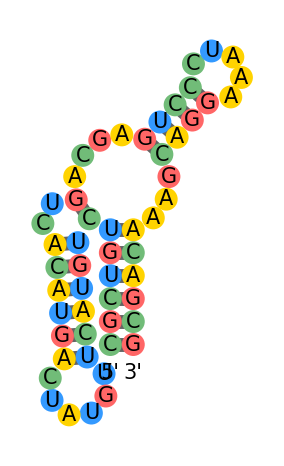

In [5]:
!pip install draw_rna

from draw_rna.ipynb_draw import draw_struct
draw_struct(sequence, structure)

Arnie provides other functions for structure prediction. We can generate a 'Base Pair Probablility' matrix that predicts the probability of every possible base pairing (e.g, how likely is base 1 to pair with base 2, base 3, base 4...). 

In [6]:
from arnie.bpps import bpps
bpps(sequence, package="eternafold")

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 6.74974e-04,
        0.00000e+00, 8.15493e-01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.13047e-01, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.13480e-01,
        0.00000e+00, 5.61778e-04],
       ...,
       [6.74974e-04, 0.00000e+00, 9.13480e-01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 9.13047e-01, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [8.15493e-01, 0.00000e+00, 5.61778e-04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

# Modeling

## Prepare Dataset

In [7]:
import pandas as pd

In [8]:
train_path = r'/kaggle/input/stanford-ribonanza-rna-folding/train_data_QUICK_START.csv'

In [9]:
train_df = pd.read_csv(train_path)

In [10]:
train_df.head()

,sequence_id,sequence,experiment_type,dataset_name,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,2A3_MaP,DasLabBigLib_OneMil_RFAM_windows_100mers_2A3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,DMS_MaP,DasLabBigLib_OneMil_RFAM_windows_100mers_DMS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,2A3_MaP,DasLabBigLib_OneMil_OpenKnot_Round_2_train_2A3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,DMS_MaP,DasLabBigLib_OneMil_OpenKnot_Round_2_train_DMS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00021f968267,GGGAACGACUCGAGUAGAGUCGAAAACAUUGUUAAUGCCUAUAUUA...,2A3_MaP,DasLabBigLib_OneMil_Replicates_from_previous_l...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train_df, test_size=0.2, random_state=283)

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class RNADataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.label_idx = [idx for idx, column in enumerate(self.df.columns) if not column.startswith('reactivity_error') and column.startswith('reactivity')]
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        input_seq = self.df['sequence'].iloc[idx]
        label_seq = self.df.iloc[idx, self.label_idx]
        label_seq = torch.FloatTensor(label_seq)
        
        return input_seq, label_seq

In [13]:
batch_size = 16

In [14]:
train_loader = DataLoader(RNADataset(train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(RNADataset(val), batch_size=batch_size, shuffle=True)

In [15]:
for inputs, labels in train_loader:
    print(inputs)
    print(labels)
    break

('GGGAACGACUCGAGUAGAGUCGAAAACGGUGAGUACAUCUUCGAGCGCAUUGAUUAUAGUGAUGCUGUAUCCUACAAGUCUAGUACAACGUAUAAACUGACUGUAGGUGACAUCUUCGUACUUACCCGAUAGCCGAUUGUUCGCAAUCGGCUAUCGAAAAGAAACAACAACAACAAC', 'GGGAACGACUCGAGUAGAGUCGAAAAGAUAUGGAAAUUGAAAUGUGCAAGGAACUCGGAAACGAGAAUUCUGAUGACCACAUCGUACGUUUCCUAAGUCAAAUCUCGCAUCUUCGGAUGCGAGAAAGGUUAACAGAUAGUUCGCUAUCUGUUAACCAAAAGAAACAACAACAACAAC', 'GGGAACGACUCGAGUAGAGUCGAAAACGAAGUCGGGAUCACAAUGUAUGGUCUGAUCAAUUGGGCACCUGAUGCAAGAGAGAACAGACUAGGGUACCAUUACGGGACUUCCAAGGCAGAAGGUAAACCUACGUUAGGGAUUCGUCCCUAACGUAGGAAAAGAAACAACAACAACAAC', 'GGGAACGACUCGAGUAGAGUCGAAAAGAUAUGGACGAACGUGAGUUGGGAGUUGCACCUCGGAAACGAGGUGUCAACUUUGAUCAACUCUCGUCCUAAGUCAAAGUACGCUCUUCGGAGCGUACAAGUGGAUAAGAUAGUUCGCUAUCUUAUCCACAAAAGAAACAACAACAACAAC', 'GGGAACGACUCGAGUAGAGUCGAAAAAUACCAGAAGGAGGUGUUCUAUUCACUCAGAGCACUGACACAGUGAAUCGUGAGUCCUUUAAGCUCUACGGUCAUGCUGUUGUGCCUUUUGGUUCUGCUGACAUCAUAUGGCCUUCGGGCCAUAUGAUGUAAAAGAAACAACAACAACAAC', 'GGGAACGACUCGAGUAGAGUCGAAAAGAAGUCGUGUCUUAGCUGAAACGAUACAACGCACGAGAUUCCAAGGUCUCUGUAGAACGACCGCUUG